In [1]:
cd /

C:\


In [2]:
cd Penn State\Projects\Lane Detection\Dataset

C:\Penn State\Projects\Lane Detection\Dataset


In [3]:
#cd drive/My Drive/MLND-Capstone-master/TM/lyft-udacity-challenge

In [16]:
import matplotlib.image as mpimg
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import data into Pandas dataframe

In [17]:
print(os.getcwd())

C:\Penn State\Projects\Lane Detection\Dataset


In [6]:
train = []

data_folders = ['dataA']

i=0
for num, folder in enumerate(data_folders):
    i +=1
    print(i, len(train))
    for file in os.listdir(os.path.join(os.getcwd(), folder, 'CameraRGB')):
        train.append([os.path.join(os.getcwd(), folder, 'CameraRGB', file),
                     os.path.join(os.getcwd(), folder, 'CameraSeg', file)])

1 0


In [7]:
train = pd.DataFrame(train, columns=['Camera_Image', 'Segmented_Images'])
print(train.head())

                                        Camera_Image  \
0  C:\Penn State\Projects\Lane Detection\Dataset\...   
1  C:\Penn State\Projects\Lane Detection\Dataset\...   
2  C:\Penn State\Projects\Lane Detection\Dataset\...   
3  C:\Penn State\Projects\Lane Detection\Dataset\...   
4  C:\Penn State\Projects\Lane Detection\Dataset\...   

                                    Segmented_Images  
0  C:\Penn State\Projects\Lane Detection\Dataset\...  
1  C:\Penn State\Projects\Lane Detection\Dataset\...  
2  C:\Penn State\Projects\Lane Detection\Dataset\...  
3  C:\Penn State\Projects\Lane Detection\Dataset\...  
4  C:\Penn State\Projects\Lane Detection\Dataset\...  


In [8]:
len(train)

1000

In [9]:
print(train.iloc[800][1])

C:\Penn State\Projects\Lane Detection\Dataset\dataA\CameraSeg\F64-1.png


In [10]:
print(train.iloc[800][0])

C:\Penn State\Projects\Lane Detection\Dataset\dataA\CameraRGB\F64-1.png


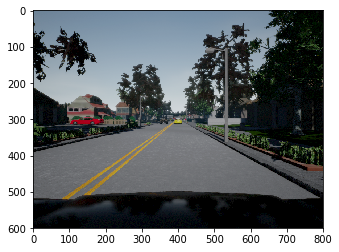

In [11]:
uhj = plt.imread(train.iloc[100][0])
plt.imshow(uhj)

# Remove Hood and Sky portion of image

In [12]:

def skyHoodRemove(image):
    image = image[160:480, :]
    return image


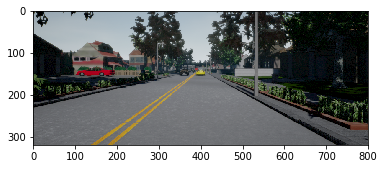

In [13]:
uhj = skyHoodRemove(uhj)
plt.imshow(uhj)

In [14]:
uhj = cv2.imread(train.iloc[100][1])
uhj

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  9],
        [ 0,  0,  9],
        [ 0,  0,  9]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  9],
        [ 0,  0,  9],
        [ 0,  0,  9]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  9],
        [ 0,  0,  9],
        [ 0,  0,  9]],

       ...,

       [[ 0,  0, 10],
        [ 0,  0, 10],
        [ 0,  0, 10],
        ...,
        [ 0,  0, 10],
        [ 0,  0, 10],
        [ 0,  0, 10]],

       [[ 0,  0, 10],
        [ 0,  0, 10],
        [ 0,  0, 10],
        ...,
        [ 0,  0, 10],
        [ 0,  0, 10],
        [ 0,  0, 10]],

       [[ 0,  0, 10],
        [ 0,  0, 10],
        [ 0,  0, 10],
        ...,
        [ 0,  0, 10],
        [ 0,  0, 10],
        [ 0,  0, 10]]], dtype=uint8)

# Convert encoded label images into Colored Segmented Images for 3 class
Each pixel in image represent corresponding class. Actula Carla encoded image has 13 class but we are interested in 3 classes:
Cars, Roads, Roadlines. 
Carla semantic Segmentation:
[link text](https://carla.readthedocs.io/en/latest/cameras_and_sensors/#camera-semantic-segmentation)

In [21]:

def LabelConverter(image):
    x= np.zeros((320, 800, 3), dtype = int)
    x_visual= np.zeros((320, 800, 3), dtype = float)
    image = skyHoodRemove(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if math.floor(max(image[i][j] )) != 7:
                x_visual[i][j] = [0.,0., 0.]
                x[i][j] =[1,1,1]
            else :
                x[i][j] = [0,0,0]
                x_visual[i][j] = [255.,255., 255.]
                
    
    return x, x_visual

# Data Visualisation

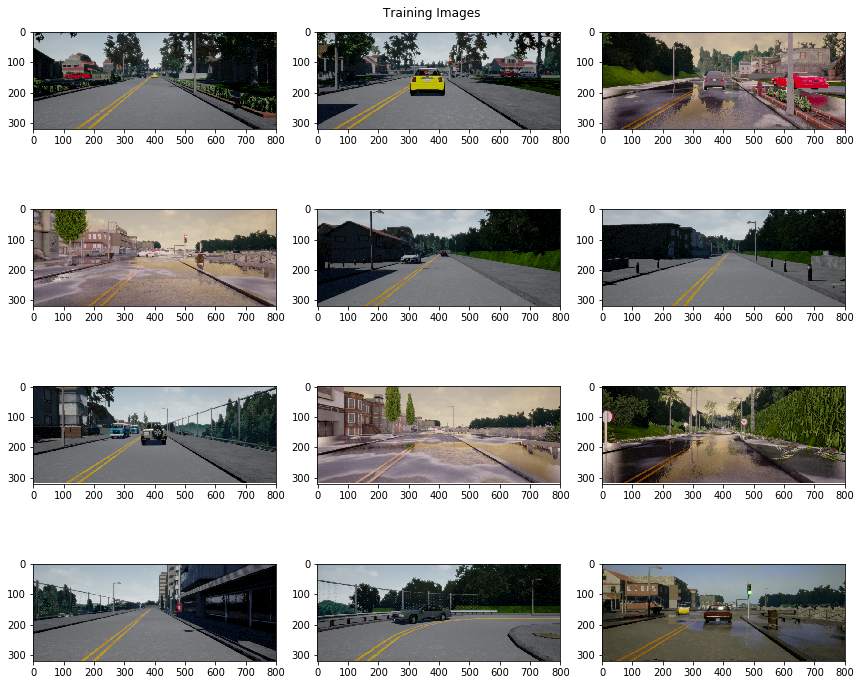

In [19]:
from random import randint

x = [randint(0, len(train)) for p in range(12)]
f, axs = plt.subplots(4,3, figsize=(12,10))
f.tight_layout()
f.suptitle('Training Images')
for i, ax in enumerate(axs.ravel()):
    ax.grid('off')
    ax.imshow(skyHoodRemove(mpimg.imread(train.iloc[x[i]][0])))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Wall time: 21.1 s


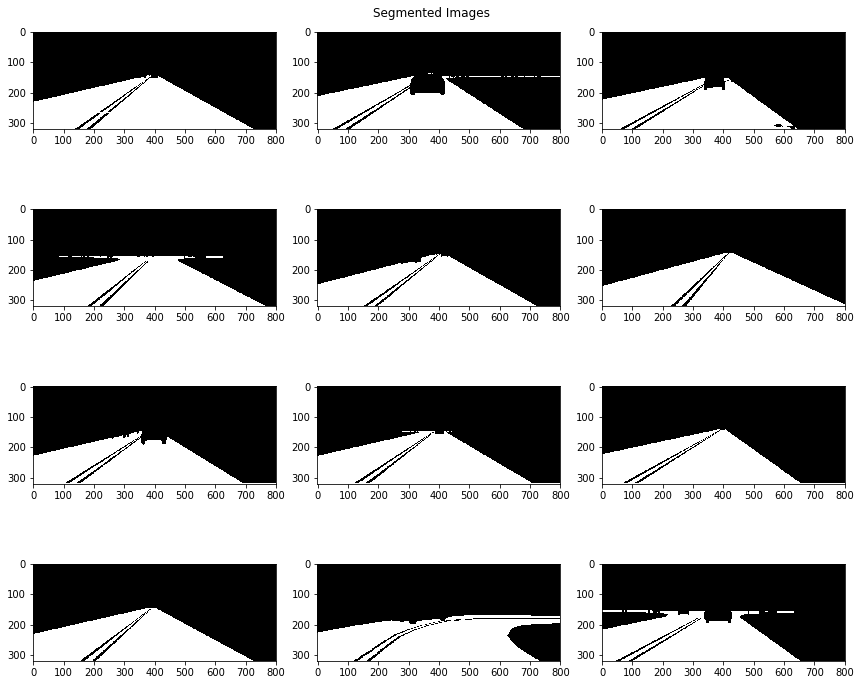

In [22]:
%%time
f, axs = plt.subplots(4,3, figsize=(12,10))
f.tight_layout()
f.suptitle('Segmented Images')
for i, ax in enumerate(axs.ravel()):
    ax.grid('off')
    _,jkl = LabelConverter(cv2.imread(train.iloc[x[i]][1]))
    ax.imshow(jkl)

In [23]:
mkdir RGB_data

# Data pre-processing and converting to numpy

In [24]:
def RGB_Preprocessing(train):
        
    colored = []
  
    for i in range(len(train)):
        color_img = cv2.imread(train.iloc[i][0])
        color_img = skyHoodRemove(color_img)
        cv2.imwrite(os.path.join(os.getcwd(),"RGB_data", str(i)+".png"), color_img)

In [25]:
%%time
Colored_train= RGB_Preprocessing(train)

Wall time: 35.4 s


In [36]:
print(Colored_train.shape)

AttributeError: 'NoneType' object has no attribute 'shape'

In [13]:
"""%%time

import pickle
data = {}
data["color"] = Colored_train
pickle_out = open(os.getcwd() + '/rgb10.pickle', 'wb')
pickle.dump(data, pickle_out, protocol=pickle.HIGHEST_PROTOCOL)
pickle_out.close()"""

Wall time: 4min 1s


In [101]:
"""import os
import psutil
pid = os.getpid()
py = psutil.Process(pid)
memoryUse = py.memory_info()[0]/2.**30  # memory use in GB
print('memory use:', memoryUse)"""

memory use: 0.23168563842773438


# Saving Segmented data into Segmented_data folder

In [28]:
mkdir Segmented_data

In [26]:
def Seg_Processing(train):
    
    seg= []
    for i in range(len(train)):
        segmented_img = cv2.imread(train.iloc[i][1])
        segmented_img, _ = LabelConverter(segmented_img)
        cv2.imwrite(os.path.join(os.getcwd(),"Segmented_data", str(i)+".png"), segmented_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


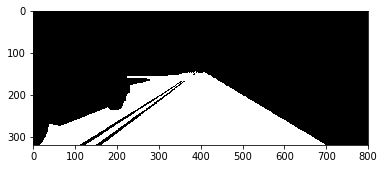

In [29]:
segmented_img = cv2.imread(train.iloc[0][1])
_,segmented_img = LabelConverter(segmented_img)
#cv2.imwrite(os.path.join(os.getcwd(),"Segmented_data", str(0)+".png"), segmented_img)
plt.imshow(segmented_img)

In [30]:
%%time
Seg_train= Seg_Processing(train)

Wall time: 15min 24s


In [31]:
segmented_img = cv2.imread(train.iloc[0][1])
segmented_img, _ = LabelConverter(segmented_img)
#cv2.imwrite(os.path.join(os.getcwd(),"Segmented_data", str(0)+".png"), segmented_img)
segmented_img

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]])

In [32]:
segmented_img[300][300]

array([0, 0, 0])